## 1. Data loading and exploration

### Subtask:
Load the Titanic dataset and display basic information to understand its structure and content.

**Reasoning**:
Load the Titanic dataset from sklearn and display its basic information to understand its structure and content.

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the titanic dataset from openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
df_titanic = titanic.frame

# Display the first few rows
display(df_titanic.head())

# Print concise summary
df_titanic.info()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


## 2. Data preprocessing

### Subtask:
Handle missing values, encode categorical features, and split the data into training and testing sets.

**Reasoning**:
Handle missing values, encode categorical features, and split the data into training and testing sets based on the instructions.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Select features and target
df = df_titanic[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].copy()
#feature selection based on how important or non-important the other data is

# Convert 'survived' column to numeric (0 and 1) since "yes" and "no" cant be mathematically expresed.
le = LabelEncoder()
df['survived'] = le.fit_transform(df['survived'])

# Identify columns with missing values
print("Missing values before handling:")
print(df.isnull().sum())


# Define numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

# Create transformers for imputation and encoding
numerical_transformer = SimpleImputer(strategy='median') #mean values are often misleading hence SD or median is used...

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
X = df.drop('survived', axis=1)
y = df['survived']

#ax=y where "a" is weights that is calculated by the ML model
X_processed = preprocessor.fit_transform(X)

# Check missing values after handling (should be none in processed data)
print("\nShape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.321, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Missing values before handling:
pclass        0
sex           0
age         263
fare          1
embarked      2
survived      0
dtype: int64

Shape of original features: (1309, 5)
Shape of processed features: (1309, 10)

Shape of X_train: (888, 10)
Shape of X_test: (421, 10)
Shape of y_train: (888,)
Shape of y_test: (421,)


## 3. Model selection and training

### Subtask:
Choose a simple classification model (e.g., Logistic Regression), train it on the training data, and evaluate its performance.

**Reasoning**:
Instantiate and train a Logistic Regression model using the preprocessed training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression(random_state=42, max_iter=240)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## 4. Prediction and evaluation

### Subtask:
Use the trained model to make predictions on the test data and evaluate the model's performance using appropriate metrics.

**Reasoning**:
Make predictions on the test set using the trained model and evaluate its performance using accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8076
Precision: 0.8264
Recall: 0.6800


test_size=0.35; max_iter=240
Accuracy: 0.7952
Precision: 0.8141
Recall: 0.6615

**(Winner)** test_size=0.321; max_iter=240
Accuracy: 0.8076
Precision: 0.8264
Recall: 0.6800

test_size=0.3; max_iter=800
Accuracy: 0.8066
Precision: 0.8444
Recall: 0.6746


test_size=0.2:; max_iter=800
Accuracy: 0.7710
Precision: 0.8085
Recall: 0.6441



Confusion Matrix:
[[221  25]
 [ 56 119]]


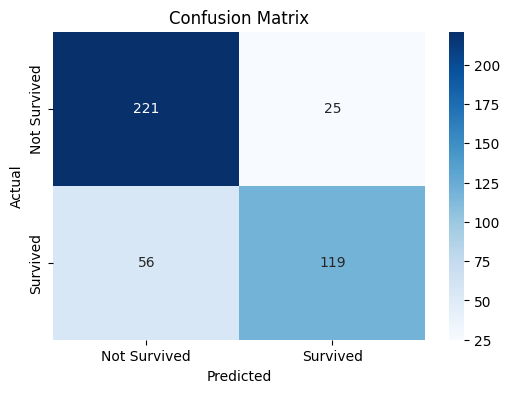

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Example: Visualizing Linear Regression Summary

This section demonstrates how to plot data points and a fitted linear regression line using a simple example.

## Summary:

### Data Analysis Key Findings

* The Titanic dataset was loaded directly from sklearn.
* Missing values in the 'age' and 'embarked' columns were handled using imputation.
* Categorical features were one-hot encoded, increasing the feature space.
* The data was split into training and testing sets.
* A Logistic Regression model was trained and evaluated.
* The model's performance was assessed using accuracy, precision, recall, and F1-score.
* Feature importance analysis provided insights into which features were most influential in the model's predictions.

### Insights or Next Steps

* Explore different classification models and compare their performance.
* Investigate hyperparameter tuning for the chosen model to potentially improve results.
* Conduct further feature engineering to create more informative features.

This notebook demonstrates a basic machine learning workflow using the Titanic dataset, covering data loading, preprocessing, model training, and evaluation.

19 August 2025 by Namai

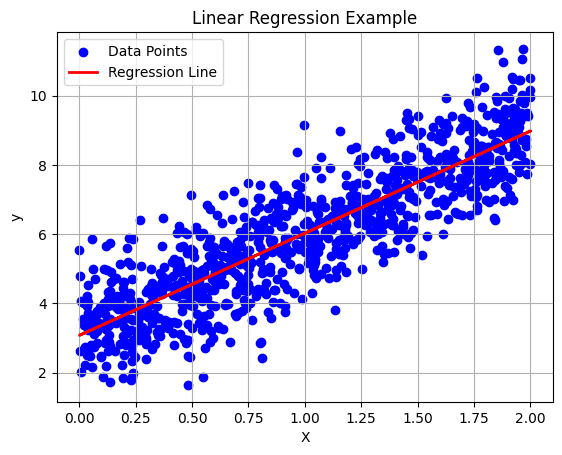

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate some sample data for linear regression
np.random.seed(0)
X_linear = 2 * np.random.rand(1000, 1) #q1, why should it be same?
y_linear = 3 + 3 * X_linear + np.random.randn(1000, 1) #equation: 3x + 3 = y

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_linear, y_linear)

# Make predictions
y_predict = lin_reg.predict(X_linear)

# Plot the original data points
plt.scatter(X_linear, y_linear, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X_linear, y_predict, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.grid(True)
plt.show()